In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
import math

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("../Datasets/practice/hiring.csv")

In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df.experience = df.experience.fillna("zero")

In [6]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(math.floor(np.mean(df["test_score(out of 10)"])))

In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [8]:
df.experience = df.experience.astype(str)
experiences = []

In [9]:
for i in df.experience:
    experiences.append(w2n.word_to_num(i))

In [10]:
experiences

[0, 0, 5, 2, 7, 3, 10, 11]

In [11]:
df.experience = experiences

In [12]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

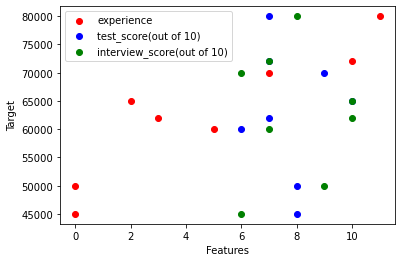

In [28]:
plt.scatter(df["experience"], df["salary($)"] , c="r")
plt.scatter(df["test_score(out of 10)"], df["salary($)"] , c="b")
plt.scatter(df["interview_score(out of 10)"],  df["salary($)"], c="g")
plt.legend(["experience", "test_score(out of 10)", "interview_score(out of 10)"])
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

In [14]:
model = LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression()

In [16]:
model.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [17]:
model.intercept_

14992.651446693118

In [18]:
y_pred = model.predict([[2,9,6],[12,10,10]])

In [19]:
y_pred

array([53713.86677124, 93747.79628651])